<a href="https://colab.research.google.com/github/IbrahimKhan77/Thesis_/blob/main/Thesis_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score 
import time


!pip install category_encoders
import category_encoders as ce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 KB 4.1 MB/s eta 0:00:00


In [2]:
!git clone https://github.com/IbrahimKhan77/Thesis_.git

Cloning into 'Thesis_'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


In [3]:
df = pd.read_excel("/content/Thesis_/Survey-Data.xlsx")
df

,Gender,Mode_of_study,Year_of_study,Home_wi-fi_access,home_desktop/laptop_access,solely_for_your_use?,Self_Digital_knowlwedge_and_skills_rating,Question 1,Question 2,Question 3,...,Question 19,Question 20,Question 21,Question 22,Question 23,Question 24,Question 25,Question 26,Question 27,Question 28
0,Male,Full-time,3,Yes,No,NaN,6,Agree,Agree,Agree,...,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree
1,Male,Full-time,3,Yes,Yes,Yes,8,Agree,Agree,Agree,...,Agree,Agree,Strongly agree,Agree,Agree,Neutral,Neutral,Neutral,Agree,Agree
2,Female,Full-time,3,Yes,Yes,Yes,4,Somewhat agree,Somewhat disagree,Somewhat agree,...,Neutral,Neutral,Disagree,Neutral,Neutral,Agree,Somewhat disagree,Agree,Somewhat disagree,Somewhat disagree
3,Male,Full-time,3,Yes,Yes,Yes,6,Somewhat agree,Agree,Agree,...,Somewhat agree,Neutral,Somewhat agree,Agree,Agree,Agree,Agree,Agree,Somewhat agree,Agree
4,Female,Full-time,3,Yes,Yes,Yes,8,Neutral,Strongly disagree,Strongly disagree,...,Agree,Agree,Strongly agree,Strongly agree,Strongly agree,Somewhat agree,Agree,Strongly agree,Somewhat agree,Somewhat agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,Female,Full-time,3,Yes,Yes,Yes,4,Somewhat disagree,Somewhat disagree,Somewhat disagree,...,Somewhat agree,Somewhat disagree,Somewhat agree,Somewhat disagree,Agree,Agree,Somewhat agree,Neutral,Neutral,Somewhat agree
421,Male,Full-time,1,Yes,Yes,Yes,7,Somewhat disagree,Agree,Agree,...,Neutral,Somewhat disagree,Agree,Strongly agree,Strongly disagree,Neutral,Somewhat agree,Strongly disagree,Somewhat agree,Somewhat agree
422,Female,Full-time,3,Yes,Yes,Yes,8,Somewhat agree,Somewhat agree,Neutral,...,Somewhat disagree,Neutral,Agree,Somewhat agree,Agree,Disagree,Somewhat agree,Strongly disagree,Somewhat disagree,Disagree
423,Female,Full-time,1,Yes,Yes,No,6,Agree,Agree,Agree,...,Agree,Somewhat agree,Agree,Neutral,Disagree,Disagree,Neutral,Somewhat agree,Agree,Agree


### Ground Truth

In [4]:
# This is my groud truth, label, dependent variable
df['Question 28'].value_counts(normalize=True)

Neutral              0.235294
Somewhat agree       0.200000
Agree                0.190588
Somewhat disagree    0.141176
Strongly disagree    0.101176
Disagree             0.084706
Strongly agree       0.047059
Name: Question 28, dtype: float64

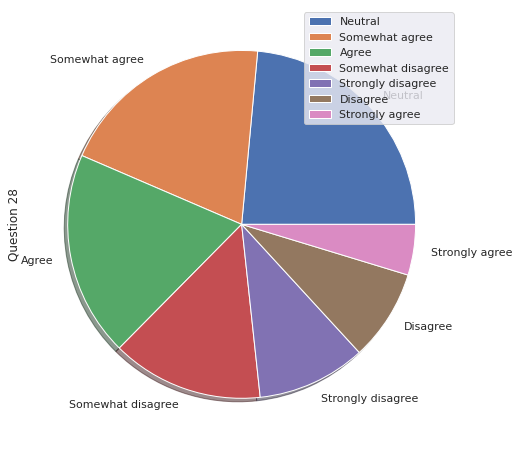

In [ ]:
df['Question 28'].value_counts(normalize=True).plot(kind="pie", shadow = True)
plt.legend()
plt.savefig("ground_truth_pie.png")

By above , we could say that 23% students are neautral and 43% agree, rest disagree

## **Univariate Data-viz**


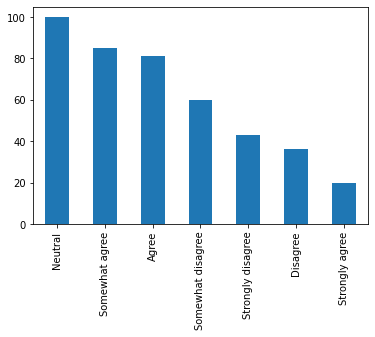

In [ ]:
df['Question 28'].value_counts().plot(kind="bar")

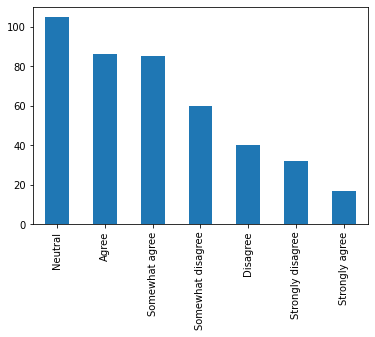

In [ ]:
df['Question 27'].value_counts().plot(kind="bar")

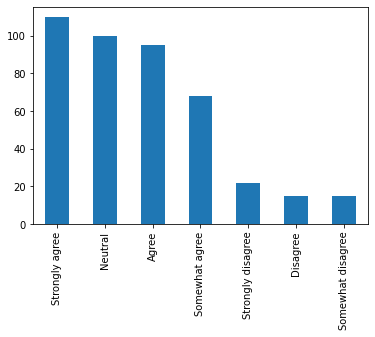

In [ ]:
df['Question 10'].value_counts().plot(kind="bar")

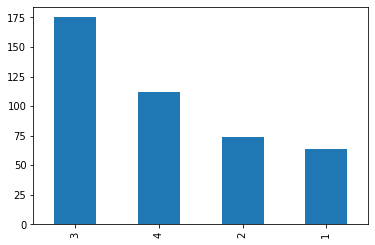

In [ ]:
df['Year_of_study'].value_counts().plot(kind="bar")
plt.savefig("Year_of_study.png")

### Replacing 'Others' with '1'

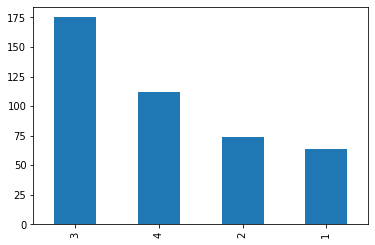

In [5]:
df['Year_of_study'] = df["Year_of_study"].replace('Others','1')
df["Year_of_study"].value_counts().plot(kind="bar")
plt.savefig("Year_of_study_.png")

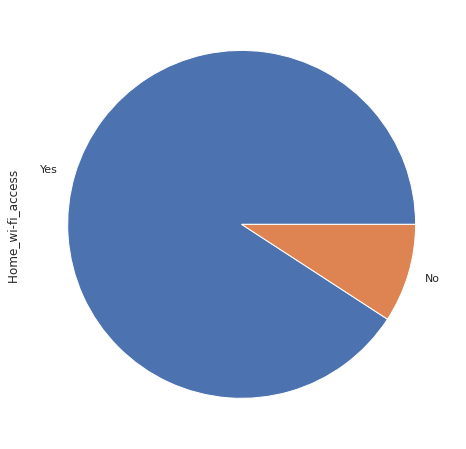

In [ ]:
df['Home_wi-fi_access '].value_counts().plot(kind="pie")
plt.savefig("Wifi-access.png")

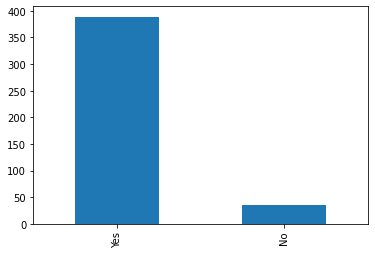

In [ ]:
df['home_desktop/laptop_access'].value_counts().plot(kind="bar")

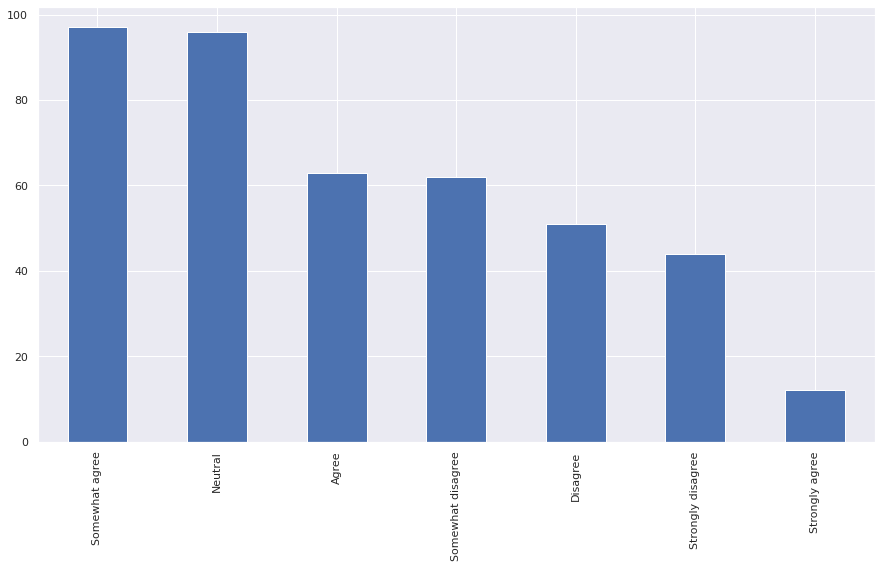

In [ ]:
df['Question 11'].value_counts().plot(kind="bar",figsize=(15, 8))
plt.savefig("dataViz_q11.png")

## **Bi-variate Data-viz**

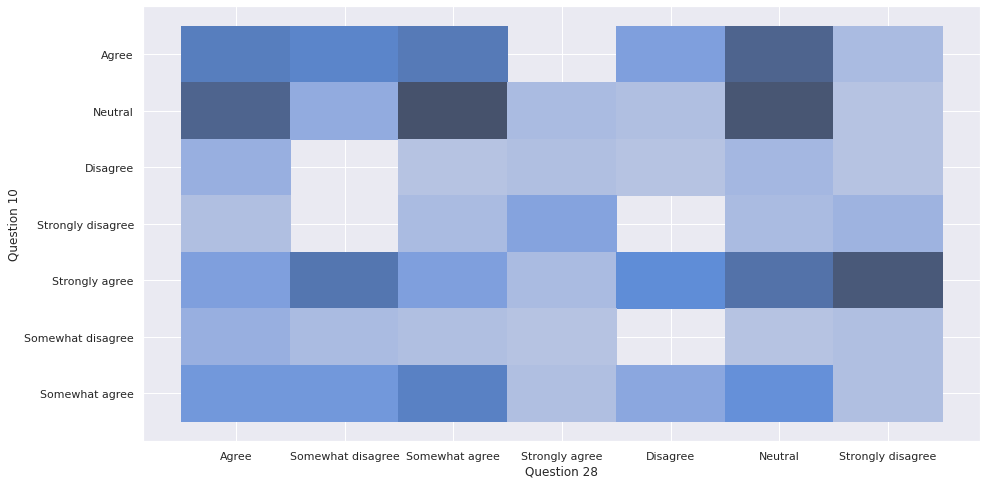

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(x='Question 28' , y='Question 10' , data=df)

plt.savefig("histplot.png")

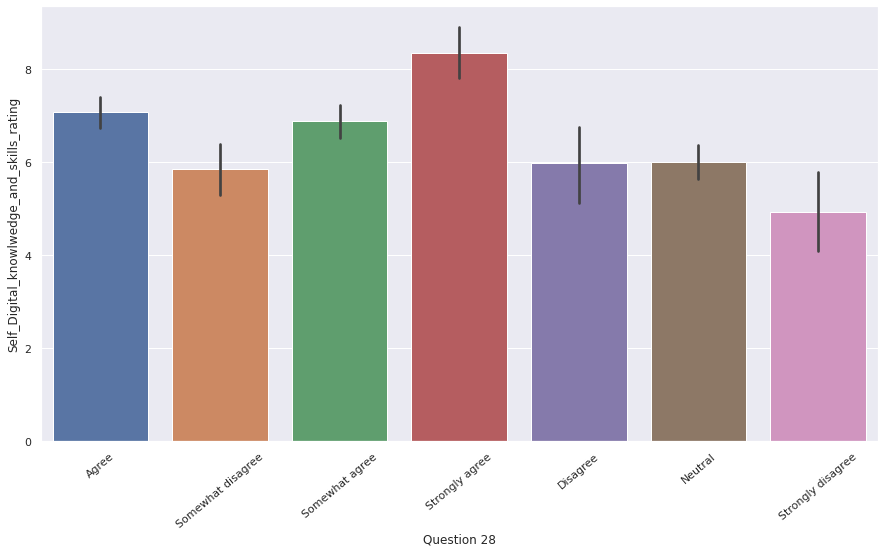

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
sns.barplot(x=df['Question 28'], y=df['Self_Digital_knowlwedge_and_skills_rating'])
plt.xticks(rotation='40')

plt.savefig("barplot.png")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


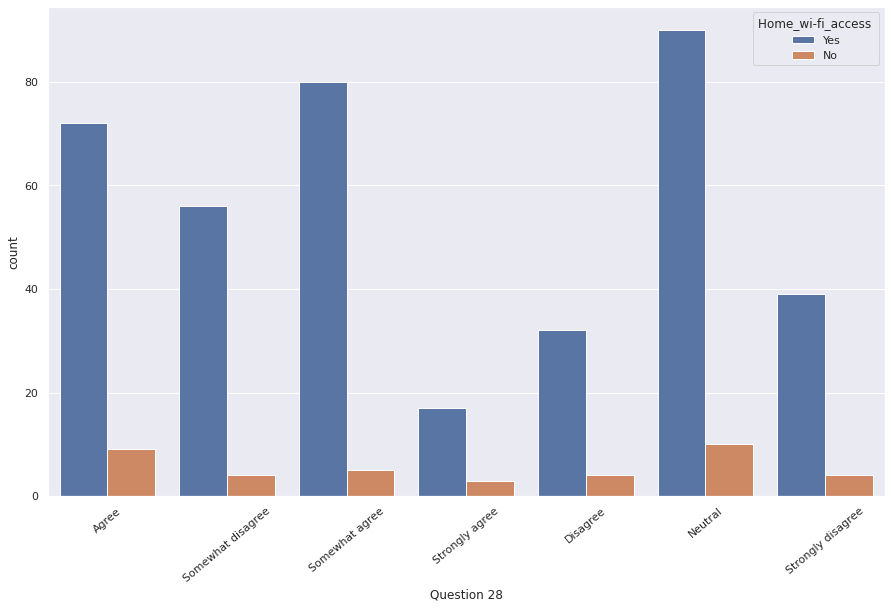

In [ ]:
plt.figure(figsize=(15, 9))
sns.countplot(df['Question 28'],
              hue=df['Home_wi-fi_access '])
plt.xticks(rotation='40')

plt.savefig("bar.png", dpi=100)

In [ ]:
df['Gender'].value_counts(normalize=True)

Female    0.512941
Male      0.487059
Name: Gender, dtype: float64

In [ ]:
df['Mode_of_study'].value_counts(normalize=True)

Full-time    0.971765
Part-time    0.028235
Name: Mode_of_study, dtype: float64

In [ ]:
df['Year_of_study'].value_counts(normalize=True)

3         0.411765
4         0.263529
2         0.174118
1         0.141176
Others    0.009412
Name: Year_of_study, dtype: float64

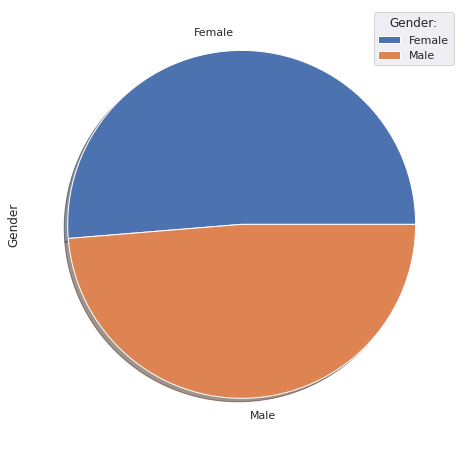

<Figure size 1080x576 with 0 Axes>

In [ ]:
df['Gender'].value_counts(normalize=True).plot(kind="pie", shadow = True)
plt.legend(title = "Gender:")
plt.show() 
plt.savefig("gender_pie.png")

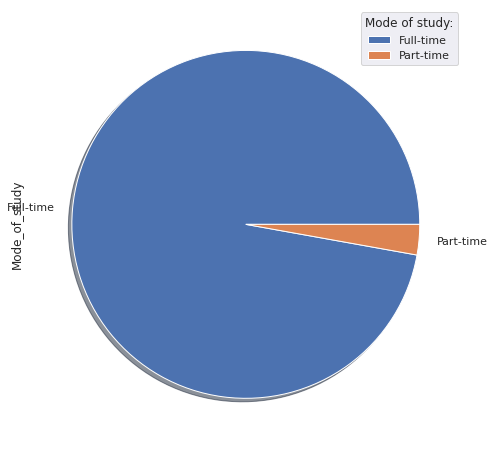

<Figure size 1080x576 with 0 Axes>

In [ ]:
df['Mode_of_study'].value_counts(normalize=True).plot(kind="pie", shadow = True)
plt.legend(title = "Mode of study:")
plt.show() 
plt.savefig('studymode-pie.png')

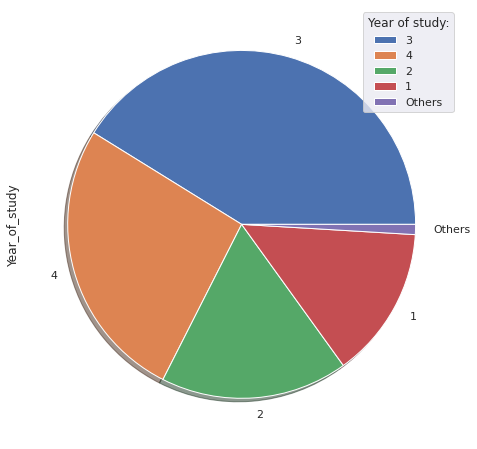

<Figure size 1080x576 with 0 Axes>

In [ ]:
df['Year_of_study'].value_counts(normalize=True).plot(kind="pie", shadow = True)
plt.legend(title = "Year of study:")
plt.show() 
plt.savefig("Year-pie.png")

## We see that - 

1.   Categorical columns with Questions needs to be converted to Numerical
2.   Only one column "solely_for_your_use?" is having missing values and rest all the columns have complete values, therefore missing values needs to be imputed 


**1 - Converting Categorical column into Numerical using Ordinal Encoding (Scikit learn)**


In [6]:
# Make a function of this

satisfaction_dict = {'Strongly agree': 1,'Agree': 2,'Somewhat agree': 3,'Neutral': 4,"Somewhat disagree":5, 'Disagree': 6,"Strongly disagree":7}
satisfaction_dict

df["Question_1"] = df['Question 1'].map(satisfaction_dict)
df["Question_2"] = df['Question 2'].map(satisfaction_dict)
df["Question_3"] = df['Question 3'].map(satisfaction_dict)
df["Question_4"] = df['Question 4'].map(satisfaction_dict)
df["Question_5"] = df['Question 5'].map(satisfaction_dict)
df["Question_6"] = df['Question 6'].map(satisfaction_dict)
df["Question_7"] = df['Question 7'].map(satisfaction_dict)
df["Question_8"] = df['Question 8'].map(satisfaction_dict)
df["Question_9"] = df['Question 9'].map(satisfaction_dict)
df["Question_10"] = df['Question 10'].map(satisfaction_dict)
df["Question_11"] = df['Question 11'].map(satisfaction_dict)
df["Question_12"] = df['Question 12'].map(satisfaction_dict)
df["Question_13"] = df['Question 13'].map(satisfaction_dict)
df["Question_14"] = df['Question 14'].map(satisfaction_dict)
df["Question_15"] = df['Question 15'].map(satisfaction_dict)
df["Question_16"] = df['Question 16'].map(satisfaction_dict)
df["Question_17"] = df['Question 17'].map(satisfaction_dict)
df["Question_18"] = df['Question 18'].map(satisfaction_dict)
df["Question_19"] = df['Question 19'].map(satisfaction_dict)
df["Question_20"] = df['Question 20'].map(satisfaction_dict)
df["Question_21"] = df['Question 21'].map(satisfaction_dict)
df["Question_22"] = df['Question 22'].map(satisfaction_dict)
df["Question_23"] = df['Question 23'].map(satisfaction_dict)
df["Question_24"] = df['Question 24'].map(satisfaction_dict)
df["Question_25"] = df['Question 25'].map(satisfaction_dict)
df["Question_26"] = df['Question 26'].map(satisfaction_dict)
df["Question_27"] = df['Question 27'].map(satisfaction_dict)


# Dependent variable
df["Question_28"] = df['Question 28'].map(satisfaction_dict)

**2 - Checking unique values in the column having missing values and imputing them with the Mode**

In [ ]:
df['solely_for_your_use?'].value_counts(normalize=True)

Yes    0.803618
No     0.196382
Name: solely_for_your_use?, dtype: float64

In [7]:
most_frequent_category = df["solely_for_your_use?"].mode()[0]
    
df["solely_for_your_use?_Imp"] = df["solely_for_your_use?"]
df["solely_for_your_use?_Imp"].fillna(most_frequent_category, inplace=True)

df['solely_for_your_use?_Imp'].value_counts(normalize=True)

Yes    0.821176
No     0.178824
Name: solely_for_your_use?_Imp, dtype: float64

We see that there is very insignificant change in %(from 80% to 82% in "YES" and from 20% to 17.8% in "NO") after imputing misisng vaues with mode.

Now both the issues have been resolved

**Now converting the Categorical columns with Demographic details into numberical USING OneHot Encoder**

In [8]:
ce_OHE = ce.OneHotEncoder(cols=["Gender","Mode_of_study","Home_wi-fi_access ","home_desktop/laptop_access","solely_for_your_use?_Imp"])

data1 = ce_OHE.fit_transform(df)
data1.head()

,Gender_1,Gender_2,Mode_of_study_1,Mode_of_study_2,Year_of_study,Home_wi-fi_access _1,Home_wi-fi_access _2,home_desktop/laptop_access_1,home_desktop/laptop_access_2,solely_for_your_use?,...,Question_21,Question_22,Question_23,Question_24,Question_25,Question_26,Question_27,Question_28,solely_for_your_use?_Imp_1,solely_for_your_use?_Imp_2
0,1,0,1,0,3,1,0,1,0,NaN,...,2,2,2,2,2,2,2,2,1,0
1,1,0,1,0,3,1,0,0,1,Yes,...,1,2,2,4,4,4,2,2,1,0
2,0,1,1,0,3,1,0,0,1,Yes,...,6,4,4,2,5,2,5,5,1,0
3,1,0,1,0,3,1,0,0,1,Yes,...,3,2,2,2,2,2,3,2,1,0
4,0,1,1,0,3,1,0,0,1,Yes,...,1,1,1,3,2,1,3,3,1,0


Chnage one hot end=coder to Get Dummies, 
Drop column "Device_use_for_learning"


**Dropping the un-necessary columns**

In [9]:
df2 = data1.drop(labels=['Question 1','solely_for_your_use?','Question 2','Question 3','Question 4','Question 5','Question 6','Question 7','Question 8',
                         'Question 9','Question 10','Question 11','Question 12','Question 13','Question 14','Question 15','Question 16','Question 17',
                         'Question 18','Question 19','Question 20','Question 21','Question 22','Question 23','Question 24','Question 25','Question 26',
                         'Question 27','Question 28'], axis=1)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 40 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Gender_1                                   425 non-null    int64 
 1   Gender_2                                   425 non-null    int64 
 2   Mode_of_study_1                            425 non-null    int64 
 3   Mode_of_study_2                            425 non-null    int64 
 4   Year_of_study                              425 non-null    object
 5   Home_wi-fi_access _1                       425 non-null    int64 
 6   Home_wi-fi_access _2                       425 non-null    int64 
 7   home_desktop/laptop_access_1               425 non-null    int64 
 8   home_desktop/laptop_access_2               425 non-null    int64 
 9   Self_Digital_knowlwedge_and_skills_rating  425 non-null    int64 
 10  Question_1                            

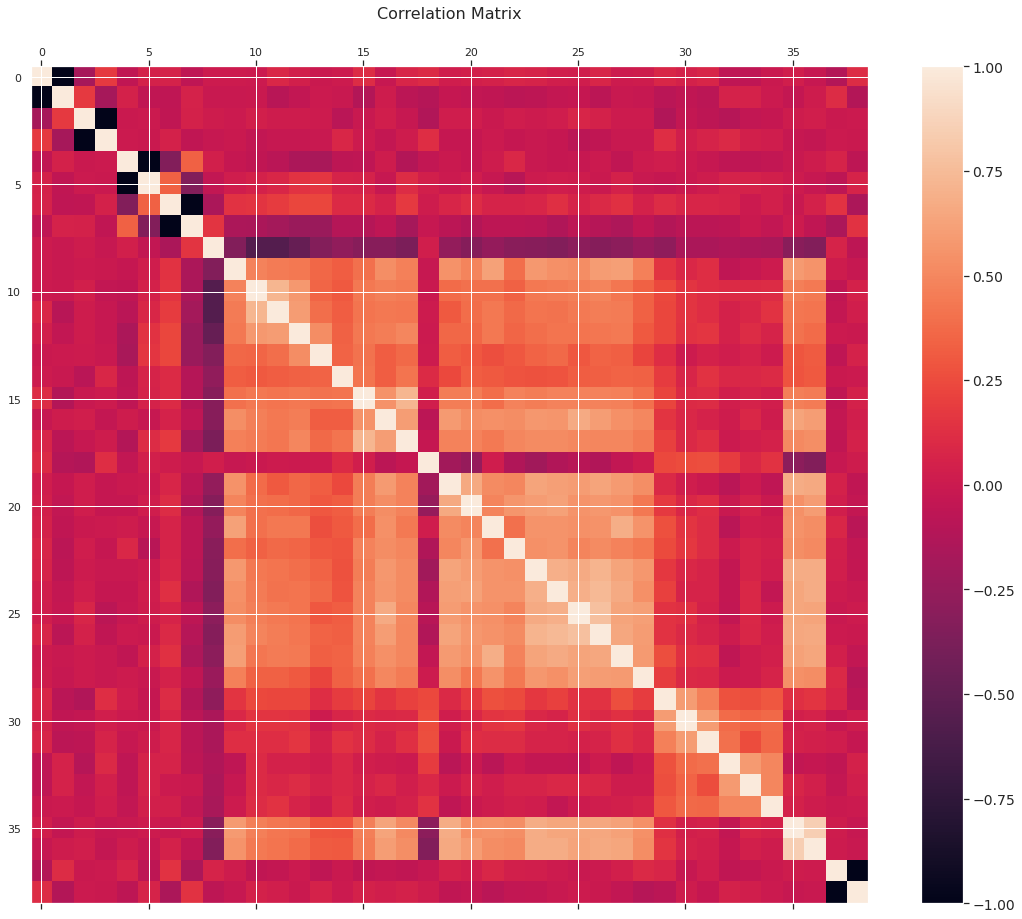

In [ ]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(19, 15))
plt.matshow(df2.corr(), fignum=f.number)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

plt.show()

## Splitting the dataset into training and testing data


We will split the data based on the year of study, since we want equal amount of students from all years to be in test data and train data as well.

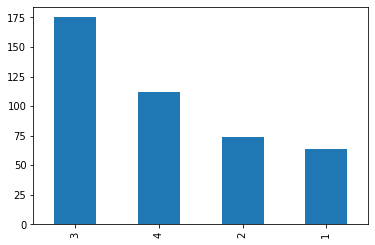

In [10]:
#Checking the number of students in all the years from the whole dataset through bar graph

from pandas.core.arrays.interval import value_counts

df2["Year_of_study"].value_counts().plot(kind="bar")

In [11]:
#Converting all dtype to int64
df2["Year_of_study"] = pd.to_numeric(df2["Year_of_study"])

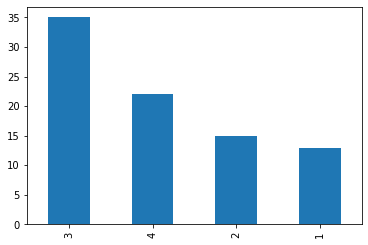

In [ ]:
# Splitting the dataset using stratified splitter

from sklearn.model_selection import StratifiedShuffleSplit

st_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=7)

train_index, test_index = list(st_splitter.split(df2,df2["Year_of_study"]))[0]

train_set = df2.loc[train_index]
test_set = df2.loc[test_index]


# checking the proposition of students of different years in test data
test_set["Year_of_study"].value_counts().plot(kind="bar")

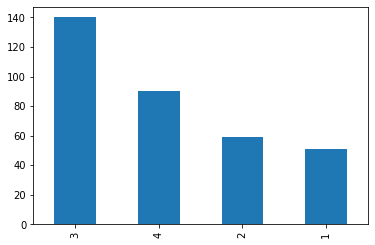

In [ ]:
# checking the proposition of students of different years in Train data
train_set["Year_of_study"].value_counts().plot(kind="bar")

**Alternate for stratififed splitting (use only one, either this or stratified)**

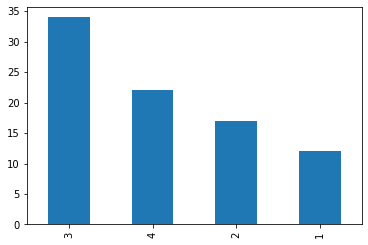

In [12]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df2,test_size=0.2, random_state=7)

test_set["Year_of_study"].value_counts().plot(kind="bar")

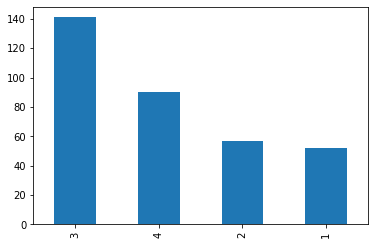

In [13]:
train_set["Year_of_study"].value_counts().plot(kind="bar")

### From above bar graph we cound confirm that both the training and testing sets have almost equal proportion of students from all year of study


# **Separating the Predictors/Independent Variables and the Target/Dependent variable From training and testing datasets**

In [14]:
Ytrain = train_set['Question_28'].copy()
Xtrain = train_set.drop("Question_28", axis=1)


Ytest = test_set['Question_28'].copy()
Xtest = test_set.drop('Question_28', axis=1)

In [15]:
print('Training dataset' , Xtrain.shape , Ytrain.shape)
print('Testing dataset' , Xtest.shape , Ytest.shape)

Training dataset (340, 39) (340,)
Testing dataset (85, 39) (85,)


# **Setting up the baseline model**

### 1 - Dummy classifier

In [ ]:
from sklearn.dummy import DummyClassifier

# Initialize Estimator
dummy_clf = DummyClassifier(strategy='stratified')

# Fitting the model
dummy_clf.fit(Xtrain,Ytrain)

# Evaluating model on test data
yhat_dummy_clas = dummy_clf.predict(Xtest)

# checking for Recall, Precision and Fscore of Baseline model
p,r,f,s = precision_recall_fscore_support(Ytest,yhat_dummy_clas, average="macro")

# Printing the results
print(f"Precision:{p}")
print(f"Recall: {r}")
print(f"F-score: {f}")

Precision:0.20350748995250273
Recall: 0.18329875012205837
F-score: 0.1891836233941497


## Logistic regression

In [ ]:
from sklearn import linear_model

log_reg = linear_model

# starting the timer
start = time.time()

log_reg = linear_model.LogisticRegression(max_iter=1900)
log_reg.fit(Xtrain,Ytrain)

end = time.time() - start
print(f"Logistic Regession took {end} seconds")

# Evaluating model on test data
yhat_log_Reg = log_reg.predict(Xtest)

# checking for Recall, Precision and Fscore of Baseline model
p,r,f,s = precision_recall_fscore_support(Ytest,yhat_log_Reg, average="macro")

# Printing the results
print(f"Precision:{p}")
print(f"Recall: {r}")
print(f"F-score: {f}")

metrics.f1_score(Ytest, yhat_log_Reg, average='weighted')

Logistic Regession took 0.944962739944458 seconds
Precision:0.5012762680829908
Recall: 0.5004748071477395
F-score: 0.48993885371594353


0.4448837449201682

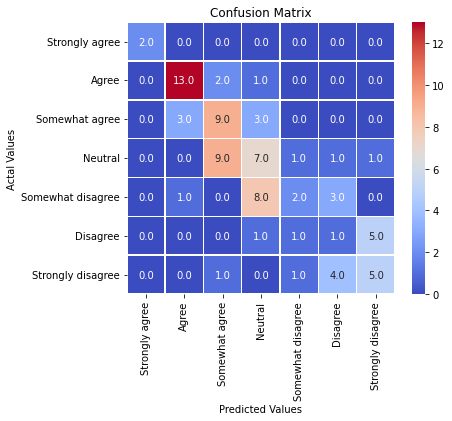

<Figure size 432x288 with 0 Axes>

In [ ]:
# cross-validation confusion matrix data
cm = confusion_matrix(Ytest, yhat_log_Reg)
cm_df = pd.DataFrame(cm, index = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'],
                     columns = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'])
#Plotting the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_df,fmt=".1f", annot=True, linewidths=.5,cmap='coolwarm')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
plt.savefig("CM_LR.PNG")

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot

knn = KNeighborsClassifier(n_neighbors=5)

# starting the timer
start = time.time()

knn.fit(Xtrain, Ytrain)

end = time.time() - start
print(f"KNN took {end} seconds")

# Evaluating model on test data
yhat_knn = knn.predict(Xtest)

# checking for Recall, Precision and Fscore of Baseline model
p,r,f,s = precision_recall_fscore_support(Ytest,yhat_knn, average="macro")

# Printing the results
print(f"Precision:{p}")
print(f"Recall: {r}")
print(f"F-score: {f}")

metrics.f1_score(Ytest, yhat_knn, average='weighted')

KNN took 0.019938945770263672 seconds
Precision:0.43576862595095417
Recall: 0.3753271164925301
F-score: 0.3739603533721181


0.3664111436429776

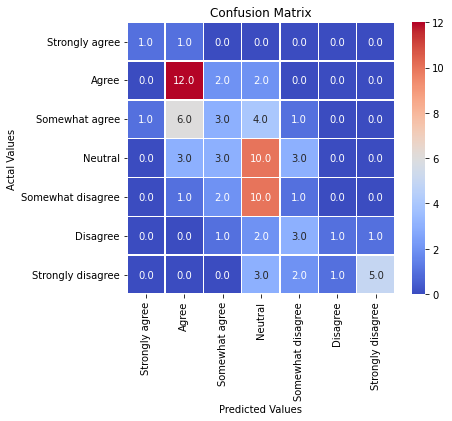

<Figure size 432x288 with 0 Axes>

In [ ]:
# cross-validation confusion matrix data
cm = confusion_matrix(Ytest, yhat_knn)
cm_df = pd.DataFrame(cm, index = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'],
                     columns = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'])
#Plotting the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_df,fmt=".1f", annot=True, linewidths=.5,cmap='coolwarm')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
plt.savefig("CM_KNN.PNG")

## Decision Tree

In [ ]:
# import the regressor
from sklearn.tree import DecisionTreeClassifier 
  
# create a regressor object
d_tree = DecisionTreeClassifier(random_state = 0) 

# starting the timer
start = time.time()
  
# fit the regressor with X and Y data
d_tree.fit(Xtrain, Ytrain)

# predicting on the test set
y_pred = d_tree.predict(Xtest)

end = time.time() - start
print(f"Decision Tree took {end} seconds")

# checking for Recall, Precision and Fscore of Baseline model
p,r,f,s = precision_recall_fscore_support(Ytest,y_pred, average="macro")

# Printing the results
print(f"Precision:{p}")
print(f"Recall: {r}")
print(f"F-score: {f}")

metrics.f1_score(Ytest, y_pred, average='weighted')

Decision Tree took 0.008579730987548828 seconds
Precision:0.5283344106873519
Recall: 0.5960648374182209
F-score: 0.5401291829863258


0.5429731488555019

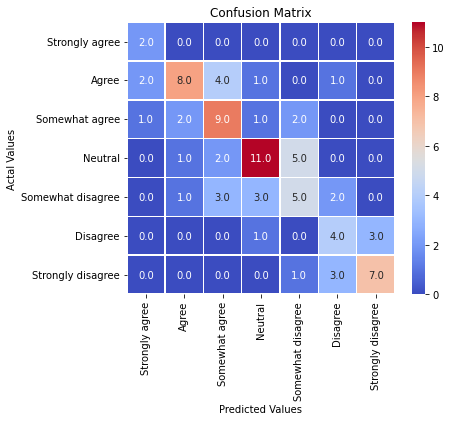

<Figure size 432x288 with 0 Axes>

In [ ]:
# cross-validation confusion matrix data
cm = confusion_matrix(Ytest, y_pred)
cm_df = pd.DataFrame(cm, index = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'],
                     columns = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'])
#Plotting the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_df,fmt=".1f", annot=True, linewidths=.5,cmap='coolwarm')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
plt.savefig("CM_DT.PNG")

## Decision Tree with hyperparametre tuning

In [ ]:
# Importing the GridSearchCV from sklearn API for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Specifying the hyperparameters and setting
dt_params = [{'max_depth':[2,4,10,50,None]},
             {'random_state':[2,7,42]},
             {'max_features':[9,15,36]}]

# Instantiating the Grid search class (cross-validation)
grid_search = GridSearchCV(d_tree, dt_params, cv=10, scoring="f1_macro", return_train_score=True)

# Starting the timer
start = time.time()

# Fitting the model
grid_search.fit(Xtrain,Ytrain)

# predicting on the test set
y_pred_tuned = grid_search.predict(Xtest)

#finding the best MOdel
print(f"Best estimator  = {grid_search.best_estimator_}")

end = time.time() - start
print(f"Hyperparametre tuned Decision Tree took {end} seconds")

# checking for Recall, Precision and Fscore of Baseline model
p,r,f,s = precision_recall_fscore_support(Ytest,y_pred_tuned, average="macro")

# Printing the results
print(f"Precision:{p}")
print(f"Recall: {r}")
print(f"F-score: {f}")

metrics.f1_score(Ytest, y_pred_tuned, average='weighted')

Best estimator  = DecisionTreeClassifier(max_depth=4, random_state=0)
Hyperparametre tuned Decision Tree took 4.122844219207764 seconds
Precision:0.6595238095238096
Recall: 0.6878775672948605
F-score: 0.6587004177066288


0.6553518111574377

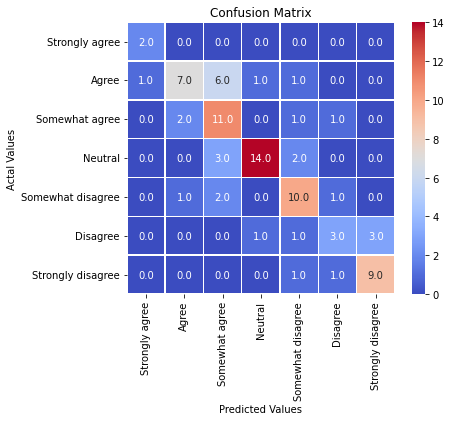

<Figure size 432x288 with 0 Axes>

In [ ]:
# cross-validation confusion matrix data
cm = confusion_matrix(Ytest, y_pred_tuned)
cm_df = pd.DataFrame(cm, index = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'],
                     columns = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'])
#Plotting the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_df,fmt=".1f", annot=True, linewidths=.5,cmap='coolwarm')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
plt.savefig("CM_TUNED_DT.PNG")

## Random forest

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


# create a RandomForestClassifier object
forest_reg = RandomForestClassifier(n_estimators= 10) 

# starting the timer
start = time.time()
  
# fit the regressor with X and Y data
forest_reg.fit(Xtrain, Ytrain)

# predicting on the test set
y_pred_RF = forest_reg.predict(Xtest)

end = time.time() - start
print(f"Random Forest took {end} seconds")

# checking for Recall, Precision and Fscore of 
p,r,f,s = precision_recall_fscore_support(Ytest,y_pred_RF,average="macro")

# Printing the results
print(f"Precision:{p}")
print(f"Recall: {r}")
print(f"F-score: {f}")

scores = cross_val_score(forest_reg, Xtrain, Ytrain, scoring = "neg_mean_squared_error" , cv=10)
rmse_scores = np.sqrt(-scores)

#print(rmse_scores)

metrics.f1_score(Ytest, y_pred_RF, average='weighted')

Random Forest took 0.03277254104614258 seconds
Precision:0.6891917606203322
Recall: 0.6540206034566937
F-score: 0.6649333255605033


0.680258028062906

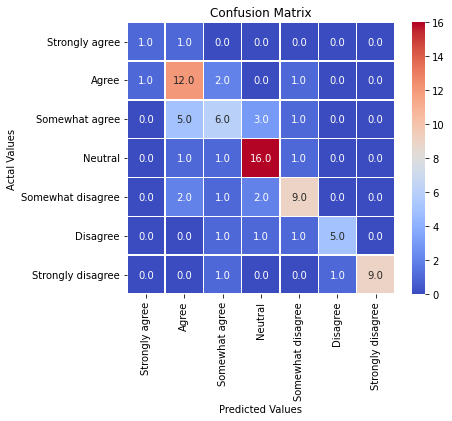

<Figure size 432x288 with 0 Axes>

In [ ]:
# cross-validation confusion matrix data
cm = confusion_matrix(Ytest, y_pred_RF)
cm_df = pd.DataFrame(cm, index = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'],
                     columns = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'])
#Plotting the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_df,fmt=".1f", annot=True, linewidths=.5,cmap='coolwarm')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
plt.savefig("CM_RF.PNG")

### Random forest with hyperparameter tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initializing the RandomForestClassifier class
forest_reg_tuned = RandomForestClassifier(random_state=7)


# Specifiying the Parameters
param_grid = [{'n_estimators': [10,20,50,100],
               'max_depth': [1,2,5,10,15],
               'bootstrap': [True,False]},]

# Cross-validating for the Fscore for all Hyperparameters
rf_grid_search = GridSearchCV(forest_reg_tuned, param_grid , cv=10,
                              scoring='f1_macro',
                              return_train_score=True)

# starting the timer
start = time.time()


# Fitting the Random Forest HyperParameter Tuned model
rf_grid_search.fit(Xtrain, Ytrain)

end = time.time() - start
print(f"Hyperparametre Tuned Random forest took {end} seconds")

#finding the best MOdel
print(f"Best estimator  = {rf_grid_search.best_estimator_}")

# predicting on the test set
y_pred_RF_tuned = rf_grid_search.predict(Xtest)

# checking for Recall, Precision and Fscore of 
p,r,f,s = precision_recall_fscore_support(Ytest,y_pred_RF_tuned,average="micro")

# Printing the results
print(f"Precision:{p}")
print(f"Recall: {r}")
print(f"F-score: {f}")

metrics.f1_score(Ytest, y_pred_RF_tuned, average='weighted')

Hyperparametre Tuned Random forest took 34.097665786743164 seconds
Best estimator  = RandomForestClassifier(bootstrap=False, max_depth=10, random_state=7)
Precision:0.6470588235294118
Recall: 0.6470588235294118
F-score: 0.6470588235294118


0.6526903684550743

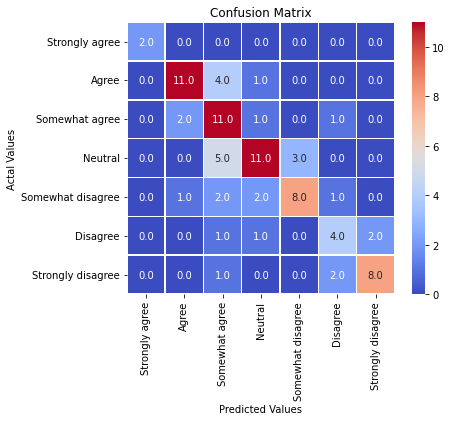

<Figure size 432x288 with 0 Axes>

In [ ]:
# cross-validation confusion matrix data
cm = confusion_matrix(Ytest, y_pred_RF_tuned)
cm_df = pd.DataFrame(cm, index = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'],
                     columns = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'])
#Plotting the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_df,fmt=".1f", annot=True, linewidths=.5,cmap='coolwarm')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
plt.savefig("CM_TUNED_RF.PNG")

## Support Vector Machine

In [ ]:
from sklearn.svm import SVC
import warnings

# Instantiating the SVC class
svm_c = SVC()

# starting the timer
start = time.time()

# Fitting the Random Forest HyperParameter Tuned model
svm_c.fit(Xtrain, Ytrain)

end = time.time() - start
print(f"SVM took {end} seconds")


# predicting on the test set
y_pred_svm = svm_c.predict(Xtest)

# checking for Recall, Precision and Fscore of 
p,r,f,s = precision_recall_fscore_support(Ytest,y_pred_svm,average="macro")

# Printing the results
print(f"Precision:{p}")
print(f"Recall: {r}")
print(f"F-score: {f}")

metrics.f1_score(Ytest, y_pred_svm, average='weighted')

SVM took 0.02399444580078125 seconds
Precision:0.3613550470693327
Recall: 0.40473830680597594
F-score: 0.37395719677511113


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.45950880456197457

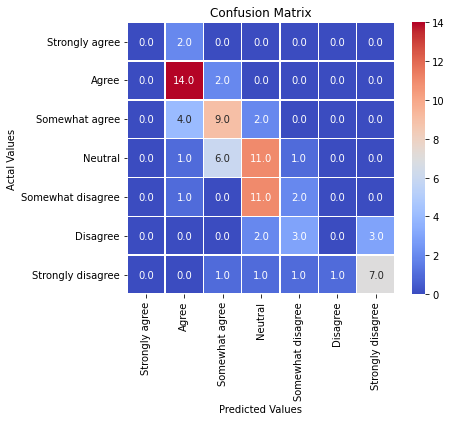

<Figure size 432x288 with 0 Axes>

In [ ]:
# cross-validation confusion matrix data
cm = confusion_matrix(Ytest, y_pred_svm)
cm_df = pd.DataFrame(cm, index = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'],
                     columns = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'])
#Plotting the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_df,fmt=".1f", annot=True, linewidths=.5,cmap='coolwarm')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
plt.savefig("CF_SVM.PNG")

## Hyperparameter tuned Support vector machine

In [ ]:
# Instantiating the SVC class
lsvm = SVC()

#Filtering out the warning for increasing number of Iterations as we already have set 'max_iter' = 8000
warnings.filterwarnings('ignore')

#specifying the Hyperparameters
param_grid_lsvm = {'C' : [0.01, 0.1, 1, 3, 10, 100],
                   'max_iter' : [10,50,100,1000,5000,10000],
                   'random_state' : [7,42]
                   }

# Cross-validating for the Fscore for all Hyperparameters
svm_grid_search = GridSearchCV(lsvm, param_grid_lsvm , cv=10,scoring='f1_macro',return_train_score=True)

# starting the timer
start = time.time()

# Fitting the Random Forest HyperParameter Tuned model
svm_grid_search.fit(Xtrain, Ytrain)

end = time.time() - start
print(f"SVM with hyperparameter tuning took {end} seconds")

#finding the best MOdel
print(f"Best estimator  = {svm_grid_search.best_estimator_}")

# predicting on the test set
y_pred_svm_tuned = svm_grid_search.predict(Xtest)

# checking for Recall, Precision and Fscore of 
p,r,f,s = precision_recall_fscore_support(Ytest,y_pred_svm_tuned,average="macro")

# Printing the results
print(f"Precision:{p}")
print(f"Recall: {r}")
print(f"F-score: {f}")

metrics.f1_score(Ytest, y_pred_svm_tuned, average='weighted')

SVM with hyperparameter tuning took 20.24125599861145 seconds
Best estimator  = SVC(C=10, max_iter=100, random_state=7)
Precision:0.4687558356676003
Recall: 0.5308213716108453
F-score: 0.4938106938106938


0.47826564532446886

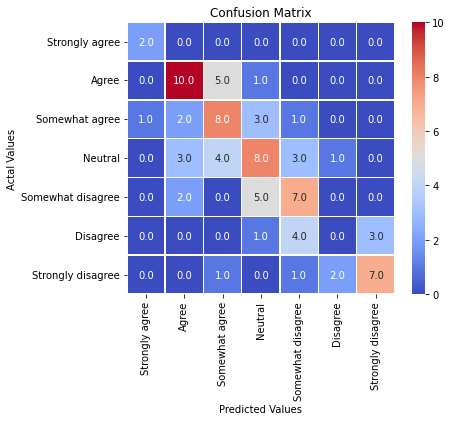

<Figure size 432x288 with 0 Axes>

In [ ]:
# cross-validation confusion matrix data
cm = confusion_matrix(Ytest, y_pred_svm_tuned)
cm_df = pd.DataFrame(cm, index = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'],
                     columns = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'])
#Plotting the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_df,fmt=".1f", annot=True, linewidths=.5,cmap='coolwarm')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
plt.savefig("CF_SVM_TUNED.PNG")

# **Neural networks**

In [ ]:
# classification mlp model for the abalone dataset
from numpy import unique
from numpy import argmax
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

n_class = len(unique(test_set))

# define the keras model
model = Sequential()
model.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(n_class, activation='softmax'))

# compile the keras model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

# fit the keras model on the dataset
model.fit(Xtrain, Ytrain, epochs=200, batch_size=32, verbose=2)
# evaluate on test set
yhat_NN = model.predict(Xtest)
yhat_NN = argmax(yhat_NN, axis=-1).astype('int')
acc = accuracy_score(Ytest, yhat_NN)
print('Accuracy: %.3f' % acc)

# checking for Recall, Precision and Fscore of 
p,r,f,s = precision_recall_fscore_support(Ytest,yhat_NN,average="macro")

# Printing the results
print(f"Precision:{p}")
print(f"Recall: {r}")
print(f"F-score: {f}")

metrics.f1_score(Ytest, yhat_NN, average='weighted')

Epoch 1/200
11/11 - 0s - loss: 10.2186 - 389ms/epoch - 35ms/step
Epoch 2/200
11/11 - 0s - loss: 5.8657 - 20ms/epoch - 2ms/step
Epoch 3/200
11/11 - 0s - loss: 3.2666 - 21ms/epoch - 2ms/step
Epoch 4/200
11/11 - 0s - loss: 2.5762 - 23ms/epoch - 2ms/step
Epoch 5/200
11/11 - 0s - loss: 2.3706 - 33ms/epoch - 3ms/step
Epoch 6/200
11/11 - 0s - loss: 2.2848 - 23ms/epoch - 2ms/step
Epoch 7/200
11/11 - 0s - loss: 2.2163 - 21ms/epoch - 2ms/step
Epoch 8/200
11/11 - 0s - loss: 2.1587 - 23ms/epoch - 2ms/step
Epoch 9/200
11/11 - 0s - loss: 2.1079 - 31ms/epoch - 3ms/step
Epoch 10/200
11/11 - 0s - loss: 2.0674 - 21ms/epoch - 2ms/step
Epoch 11/200
11/11 - 0s - loss: 2.0251 - 22ms/epoch - 2ms/step
Epoch 12/200
11/11 - 0s - loss: 1.9823 - 24ms/epoch - 2ms/step
Epoch 13/200
11/11 - 0s - loss: 1.9476 - 22ms/epoch - 2ms/step
Epoch 14/200
11/11 - 0s - loss: 1.9238 - 23ms/epoch - 2ms/step
Epoch 15/200
11/11 - 0s - loss: 1.9019 - 25ms/epoch - 2ms/step
Epoch 16/200
11/11 - 0s - loss: 1.8828 - 20ms/epoch - 2ms/ste

0.4557526395173455

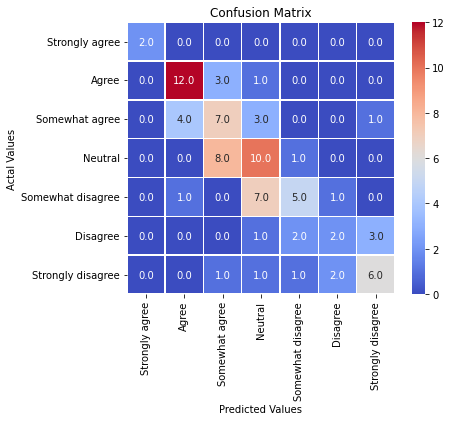

<Figure size 432x288 with 0 Axes>

In [ ]:
# cross-validation confusion matrix data
cm = confusion_matrix(Ytest, yhat_NN)
cm_df = pd.DataFrame(cm, index = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'],
                     columns = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'])
#Plotting the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_df,fmt=".1f", annot=True, linewidths=.5,cmap='coolwarm')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
plt.savefig("CF_NN.PNG")

# Smote oversampling

In [ ]:
Ytest.value_counts()

4    19
2    16
3    15
5    14
7    11
6     8
1     2
Name: Question_28, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

# OverSampling by SMOTE the dataset
oversample = SMOTE(random_state=11)

#Fitting the SMOTE oversampling and storing the new train set in X_smote and Y_smote
X_smote, y_smote = oversample.fit_resample(Xtrain, Ytrain)

y_smote.value_counts()

5    81
4    81
6    81
2    81
7    81
3    81
1    81
Name: Question_28, dtype: int64

In [ ]:
X_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 39 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Gender_1                                   567 non-null    int64
 1   Gender_2                                   567 non-null    int64
 2   Mode_of_study_1                            567 non-null    int64
 3   Mode_of_study_2                            567 non-null    int64
 4   Year_of_study                              567 non-null    int64
 5   Home_wi-fi_access _1                       567 non-null    int64
 6   Home_wi-fi_access _2                       567 non-null    int64
 7   home_desktop/laptop_access_1               567 non-null    int64
 8   home_desktop/laptop_access_2               567 non-null    int64
 9   Self_Digital_knowlwedge_and_skills_rating  567 non-null    int64
 10  Question_1                                 567 non

In [ ]:
log_reg = linear_model

# starting the timer
start = time.time()

log_reg = linear_model.LogisticRegression(max_iter=1900)
log_reg.fit(X_smote,y_smote)

end = time.time() - start
print(f"Logistic Regession after smote oversampling took {end} seconds")

# Evaluating model on test data
yhat_log_Reg = log_reg.predict(Xtest)

# checking for Recall, Precision and Fscore of Baseline model
p,r,f,s = precision_recall_fscore_support(Ytest,yhat_log_Reg, average="macro")

# Printing the results
print(f"Precision:{p}")
print(f"Recall: {r}")
print(f"F-score: {f}")

metrics.f1_score(Ytest, yhat_log_Reg, average='weighted')

Logistic Regession after smote oversampling took 1.2582666873931885 seconds
Precision:0.49963450292397665
Recall: 0.5039380106109429
F-score: 0.49386189258312024


0.4498029186098992

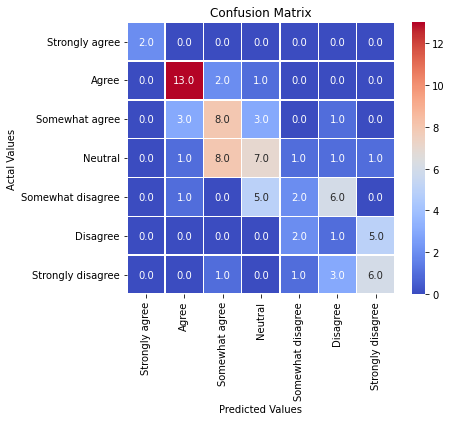

<Figure size 432x288 with 0 Axes>

In [ ]:
# cross-validation confusion matrix data
cm = confusion_matrix(Ytest, yhat_log_Reg)
cm_df = pd.DataFrame(cm, index = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'],
                     columns = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'])
#Plotting the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_df,fmt=".1f", annot=True, linewidths=.5,cmap='coolwarm')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
plt.savefig("CF_OS_LR.PNG")

In [ ]:
# create a CLASSIFIER object
d_tree = DecisionTreeClassifier(random_state = 0) 

# starting the timer
start = time.time()
  
# fit the regressor with X and Y data
d_tree.fit(X_smote, y_smote)

# predicting on the test set
y_pred = d_tree.predict(Xtest)

end = time.time() - start
print(f"Decision Tree after Smote Oversampling took {end} seconds")

# checking for Recall, Precision and Fscore of Baseline model
p,r,f,s = precision_recall_fscore_support(Ytest,y_pred, average="macro")

# Printing the results
print(f"Precision:{p}")
print(f"Recall: {r}")
print(f"F-score: {f}")

metrics.f1_score(Ytest, y_pred, average='weighted')

Decision Tree after Smote Oversampling took 0.019030332565307617 seconds
Precision:0.6120809328516096
Recall: 0.6536849428766722
F-score: 0.6237658699843573


0.5798187510298237

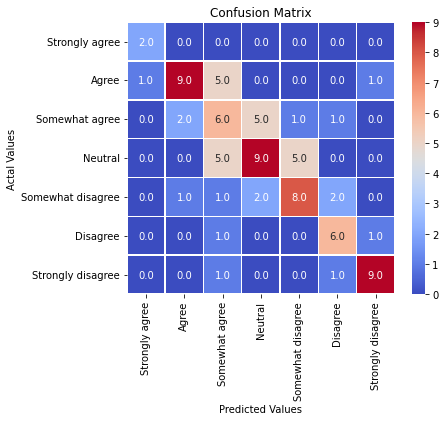

<Figure size 432x288 with 0 Axes>

In [ ]:
# cross-validation confusion matrix data
cm = confusion_matrix(Ytest, y_pred)
cm_df = pd.DataFrame(cm, index = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'],
                     columns = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'])
#Plotting the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_df,fmt=".1f", annot=True, linewidths=.5,cmap='coolwarm')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
plt.savefig("CF_OS_DT.PNG")

In [ ]:
# Specifying the hyperparameters and setting
dt_params = [{'max_depth':[2,4,10,50,100,None]},
             {'random_state':[2,7,42]},
             {'max_features':[9,15,36]}]

# Instantiating the Grid search class (cross-validation)
grid_search = GridSearchCV(d_tree, dt_params, cv=10, scoring="f1_macro", return_train_score=True)

# Starting the timer
start = time.time()

# Fitting the model
grid_search.fit(X_smote, y_smote)

# predicting on the test set
y_pred_tuned = grid_search.predict(Xtest)

end = time.time() - start
print(f"Decision tree with hyperparametre tuning and smote oversampling took {end} seconds")

# checking for Recall, Precision and Fscore of Baseline model
p,r,f,s = precision_recall_fscore_support(Ytest,y_pred_tuned, average="macro")

# Printing the results
print(f"Precision:{p}")
print(f"Recall: {r}")
print(f"F-score: {f}")

metrics.f1_score(Ytest, y_pred_tuned, average='weighted')

Decision tree with hyperparametre tuning and smote oversampling took 1.3322300910949707 seconds
Precision:0.6007238792953079
Recall: 0.6597939654330631
F-score: 0.6230159051748256


0.5835052584995261

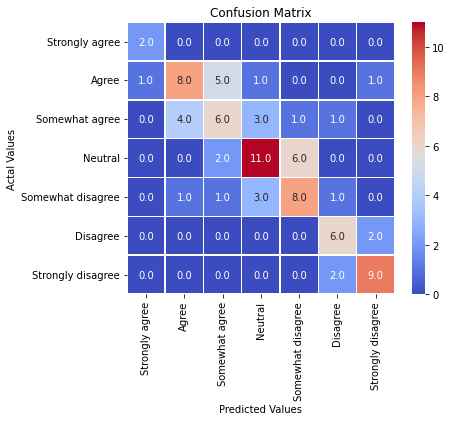

<Figure size 432x288 with 0 Axes>

In [ ]:
# cross-validation confusion matrix data
cm = confusion_matrix(Ytest, y_pred_tuned)
cm_df = pd.DataFrame(cm, index = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'],
                     columns = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'])
#Plotting the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_df,fmt=".1f", annot=True, linewidths=.5,cmap='coolwarm')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
plt.savefig("CF_OS_DT_TUNED.PNG")

In [ ]:
# create a RandomForestClassifier object
forest_reg = RandomForestClassifier(n_estimators= 10) 

# starting the timer
start = time.time()
  
# fit the regressor with X and Y data
forest_reg.fit(X_smote, y_smote)

# predicting on the test set
y_pred_RF = forest_reg.predict(Xtest)

end = time.time() - start
print(f"Random Forest WITH SMOTE OVERSAMPLING took {end} seconds")

# checking for Recall, Precision and Fscore of 
p,r,f,s = precision_recall_fscore_support(Ytest,y_pred_RF,average="macro")

# Printing the results
print(f"Precision:{p}")
print(f"Recall: {r}")
print(f"F-score: {f}")

scores = cross_val_score(forest_reg, Xtrain, Ytrain, scoring = "neg_mean_squared_error" , cv=10)
rmse_scores = np.sqrt(-scores)

#print(rmse_scores)

metrics.f1_score(Ytest, y_pred_RF, average='weighted')

Random Forest WITH SMOTE OVERSAMPLING took 0.034522056579589844 seconds
Precision:0.6004947433518861
Recall: 0.6494564332910198
F-score: 0.5975312391096096


0.5965283300020775

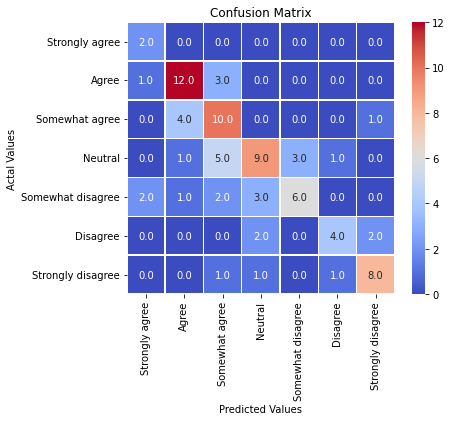

<Figure size 432x288 with 0 Axes>

In [ ]:
# cross-validation confusion matrix data
cm = confusion_matrix(Ytest, y_pred_RF)
cm_df = pd.DataFrame(cm, index = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'],
                     columns = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'])
#Plotting the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_df,fmt=".1f", annot=True, linewidths=.5,cmap='coolwarm')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
plt.savefig("CF_OS_RF.PNG")

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

# starting the timer
start = time.time()

knn.fit(X_smote, y_smote)

end = time.time() - start
print(f"KNN WITH SMOTE OVERSAMPLING took {end} seconds")

# Evaluating model on test data
yhat_knn = knn.predict(Xtest)

# checking for Recall, Precision and Fscore of Baseline model
p,r,f,s = precision_recall_fscore_support(Ytest,yhat_knn, average="macro")

# Printing the results
print(f"Precision:{p}")
print(f"Recall: {r}")
print(f"F-score: {f}")

metrics.f1_score(Ytest, yhat_knn, average='weighted')

KNN WITH SMOTE OVERSAMPLING took 0.006249189376831055 seconds
Precision:0.43700525664811385
Recall: 0.46101821111219604
F-score: 0.4417186417186417


0.4676401288165995

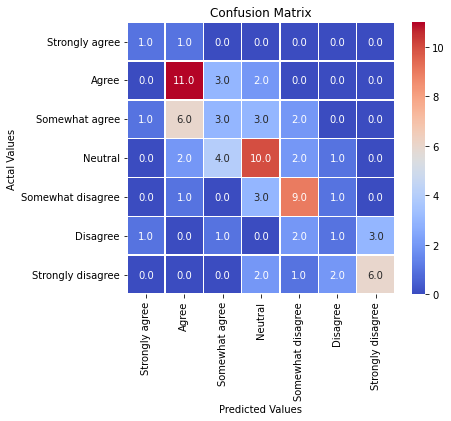

<Figure size 432x288 with 0 Axes>

In [ ]:
# cross-validation confusion matrix data
cm = confusion_matrix(Ytest, yhat_knn)
cm_df = pd.DataFrame(cm, index = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'],
                     columns = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'])
#Plotting the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_df,fmt=".1f", annot=True, linewidths=.5,cmap='coolwarm')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
plt.savefig("CF_KNN_OS.PNG")

In [ ]:
# Initializing the RandomForestClassifier class
forest_reg_tuned = RandomForestClassifier(random_state=7)

# Specifiying the Parameters
param_grid = [{'n_estimators': [10,20,50,100],
               'max_depth': [1,2,5,10,15],
               'bootstrap': [True,False]},]

# Cross-validating for the Fscore for all Hyperparameters
rf_grid_search = GridSearchCV(forest_reg_tuned, param_grid , cv=10,
                              scoring='f1_macro',
                              return_train_score=True)

# starting the timer
start = time.time()

# Fitting the Random Forest HyperParameter Tuned model
rf_grid_search.fit(X_smote, y_smote)

end = time.time() - start
print(f"Decision Tree took {end} seconds")

#finding the best MOdel
rf_grid_search.best_estimator_

# predicting on the test set
y_pred_RF_tuned = rf_grid_search.predict(Xtest)

# checking for Recall, Precision and Fscore of 
p,r,f,s = precision_recall_fscore_support(Ytest,y_pred_RF_tuned,average="macro")

# Printing the results
print(f"Precision:{p}")
print(f"Recall: {r}")
print(f"F-score: {f}")

metrics.f1_score(Ytest, y_pred_RF_tuned, average='weighted')

Decision Tree took 38.52133131027222 seconds
Precision:0.6209490789322721
Recall: 0.6423493799433649
F-score: 0.6190284666371623


0.6047228342036527

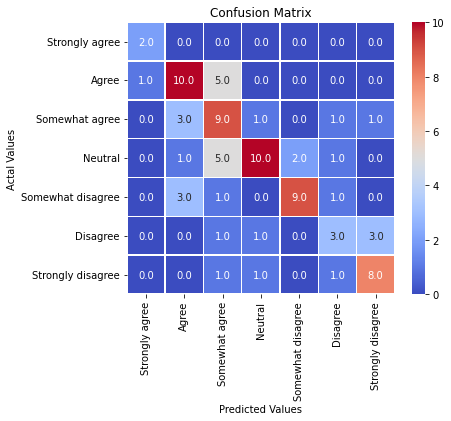

<Figure size 432x288 with 0 Axes>

In [ ]:
# cross-validation confusion matrix data
cm = confusion_matrix(Ytest, y_pred_RF_tuned)
cm_df = pd.DataFrame(cm, index = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'],
                     columns = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'])
#Plotting the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_df,fmt=".1f", annot=True, linewidths=.5,cmap='coolwarm')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
plt.savefig("CF_OS_RF_TUNED.PNG")

In [ ]:
# Instantiating the SVC class
svm_c_ = SVC()

# starting the timer
start = time.time()

# Fitting the Random Forest HyperParameter Tuned model
svm_c_.fit(X_smote, y_smote)

end = time.time() - start
print(f"SVM after smote oversampling took {end} seconds")


# predicting on the test set
y_pred_svm = svm_c_.predict(Xtest)

# checking for Recall, Precision and Fscore of 
p,r,f,s = precision_recall_fscore_support(Ytest,y_pred_svm,average="macro")

# Printing the results
print(f"Precision:{p}")
print(f"Recall: {r}")
print(f"F-score: {f}")

metrics.f1_score(Ytest, y_pred_svm, average='weighted')

SVM after smote oversampling took 0.03182864189147949 seconds
Precision:0.5160213220363596
Recall: 0.5257685610129219
F-score: 0.5150653579225007


0.538902578902579

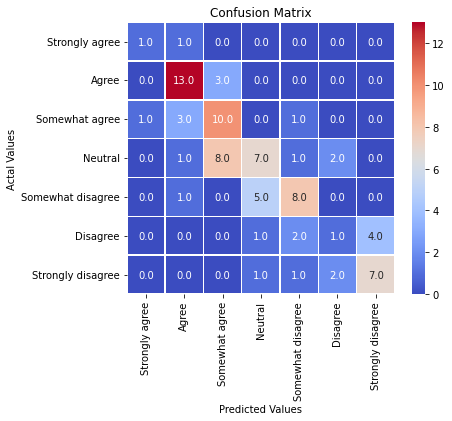

<Figure size 432x288 with 0 Axes>

In [ ]:
# cross-validation confusion matrix data
cm = confusion_matrix(Ytest, y_pred_svm)
cm_df = pd.DataFrame(cm, index = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'],
                     columns = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'])
#Plotting the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_df,fmt=".1f", annot=True, linewidths=.5,cmap='coolwarm')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
plt.savefig("CF_OS_SVM.PNG")

In [ ]:
# Instantiating the SVC class
lsvm_OS = SVC()

#Filtering out the warning for increasing number of Iterations as we already have set 'max_iter' = 8000
warnings.filterwarnings('ignore')

#specifying the Hyperparameters
param_grid_lsvm = {'C' : [0.01, 0.1, 1, 3, 10, 100],
                   'max_iter' : [8000,10000],
                   'random_state' : [7]}

# Cross-validating for the Fscore for all Hyperparameters
svm_grid_search = GridSearchCV(lsvm_OS, param_grid_lsvm , cv=10,scoring='f1_macro',return_train_score=True)

# starting the timer
start = time.time()

# Fitting the Random Forest HyperParameter Tuned model
svm_grid_search.fit(X_smote, y_smote)

end = time.time() - start
print(f"SVM after smote oversampling AND HYPERPARAMETRE TUNING took {end} seconds")

#finding the best MOdel
print(f"Best estimator  = {svm_grid_search.best_estimator_}")

# predicting on the test set
y_pred_svm = svm_grid_search.predict(Xtest)

# checking for Recall, Precision and Fscore of 
p,r,f,s = precision_recall_fscore_support(Ytest,y_pred_svm,average="macro")

# Printing the results
print(f"Precision:{p}")
print(f"Recall: {r}")
print(f"F-score: {f}")

metrics.f1_score(Ytest, y_pred_svm, average='weighted')

SVM after smote oversampling AND HYPERPARAMETRE TUNING took 7.211413621902466 seconds
Best estimator  = SVC(C=10, max_iter=8000, random_state=7)
Precision:0.5079978479686188
Recall: 0.5445350388959411
F-score: 0.5149323525263375


0.49845773077971217

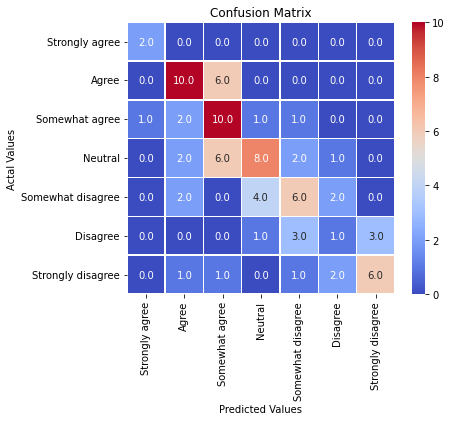

<Figure size 432x288 with 0 Axes>

In [ ]:
# cross-validation confusion matrix data
cm = confusion_matrix(Ytest, y_pred_svm)
cm_df = pd.DataFrame(cm, index = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'],
                     columns = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'])
#Plotting the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_df,fmt=".1f", annot=True, linewidths=.5,cmap='coolwarm')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
plt.savefig("CF_OS_SVM_TUNED.PNG")

In [ ]:
n_class = len(unique(test_set))

# define the keras model
model = Sequential()
model.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(n_class, activation='softmax'))

# compile the keras model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

# fit the keras model on the dataset
model.fit(X_smote, y_smote, epochs=200, batch_size=32, verbose=2)
# evaluate on test set
yhat_NN = model.predict(Xtest)
yhat_NN = argmax(yhat_NN, axis=-1).astype('int')
acc = accuracy_score(Ytest, yhat_NN)
print('Accuracy: %.3f' % acc)

# checking for Recall, Precision and Fscore of 
p,r,f,s = precision_recall_fscore_support(Ytest,yhat_NN,average="macro")

# Printing the results
print(f"Precision:{p}")
print(f"Recall: {r}")
print(f"F-score: {f}")

metrics.f1_score(Ytest, yhat_NN, average='weighted')

Epoch 1/200
18/18 - 0s - loss: 4.4363 - 417ms/epoch - 23ms/step
Epoch 2/200
18/18 - 0s - loss: 2.9834 - 38ms/epoch - 2ms/step
Epoch 3/200
18/18 - 0s - loss: 2.5292 - 45ms/epoch - 3ms/step
Epoch 4/200
18/18 - 0s - loss: 2.3586 - 33ms/epoch - 2ms/step
Epoch 5/200
18/18 - 0s - loss: 2.2814 - 41ms/epoch - 2ms/step
Epoch 6/200
18/18 - 0s - loss: 2.2329 - 39ms/epoch - 2ms/step
Epoch 7/200
18/18 - 0s - loss: 2.1920 - 32ms/epoch - 2ms/step
Epoch 8/200
18/18 - 0s - loss: 2.1595 - 38ms/epoch - 2ms/step
Epoch 9/200
18/18 - 0s - loss: 2.1293 - 35ms/epoch - 2ms/step
Epoch 10/200
18/18 - 0s - loss: 2.1011 - 42ms/epoch - 2ms/step
Epoch 11/200
18/18 - 0s - loss: 2.0707 - 33ms/epoch - 2ms/step
Epoch 12/200
18/18 - 0s - loss: 2.0430 - 33ms/epoch - 2ms/step
Epoch 13/200
18/18 - 0s - loss: 2.0141 - 45ms/epoch - 2ms/step
Epoch 14/200
18/18 - 0s - loss: 1.9863 - 35ms/epoch - 2ms/step
Epoch 15/200
18/18 - 0s - loss: 1.9582 - 34ms/epoch - 2ms/step
Epoch 16/200
18/18 - 0s - loss: 1.9332 - 33ms/epoch - 2ms/step

0.42932542139662877

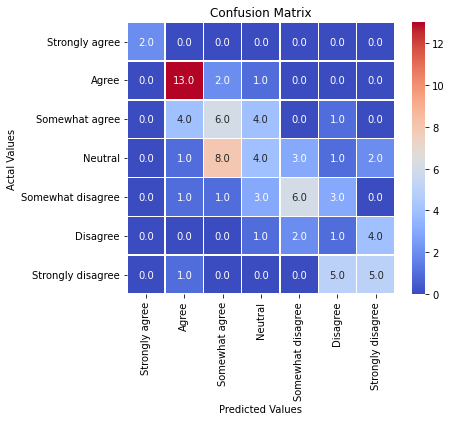

<Figure size 432x288 with 0 Axes>

In [ ]:
# cross-validation confusion matrix data
cm = confusion_matrix(Ytest, yhat_NN)
cm_df = pd.DataFrame(cm, index = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'],
                     columns = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'])
#Plotting the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_df,fmt=".1f", annot=True, linewidths=.5,cmap='coolwarm')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
plt.savefig("CF_NN_OS.PNG")

## **Dropping the variables which are highly correlated from train and test sets for better data modelling**

In [16]:
# create correlation  matrix
corr_matrix = Xtrain.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

# Drop features 
Xtrain.drop(to_drop, axis=1, inplace=True)
Xtest.drop(to_drop, axis=1, inplace=True)

Xtrain.info()
Xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 417 to 175
Data columns (total 33 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Gender_1                                   340 non-null    int64
 1   Mode_of_study_1                            340 non-null    int64
 2   Year_of_study                              340 non-null    int64
 3   Home_wi-fi_access _1                       340 non-null    int64
 4   home_desktop/laptop_access_1               340 non-null    int64
 5   Self_Digital_knowlwedge_and_skills_rating  340 non-null    int64
 6   Question_1                                 340 non-null    int64
 7   Question_2                                 340 non-null    int64
 8   Question_3                                 340 non-null    int64
 9   Question_4                                 340 non-null    int64
 10  Question_5                                 340 n

<ipython-input-16-e92f35ee9ef6>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [ ]:
log_reg = linear_model

# starting the timer
start = time.time()

log_reg = linear_model.LogisticRegression(max_iter=3000)
log_reg.fit(Xtrain,Ytrain)

end = time.time() - start
print(f"Logistic Regession AFTER DROPPING HIGHLY CORRELATED VARIABLES took {end} seconds")

# Evaluating model on test data
yhat_log_Reg = log_reg.predict(Xtest)

# checking for Recall, Precision and Fscore of Baseline model
p,r,f,s = precision_recall_fscore_support(Ytest,yhat_log_Reg, average="macro")

# Printing the results
print(f"Precision:{p}")
print(f"Recall: {r}")
print(f"F-score: {f}")

metrics.f1_score(Ytest, yhat_log_Reg, average='weighted')

Logistic Regession AFTER DROPPING HIGHLY CORRELATED VARIABLES took 0.9849586486816406 seconds
Precision:0.5036572204639432
Recall: 0.5059885916088923
F-score: 0.4983405483405484


0.4602079619726678

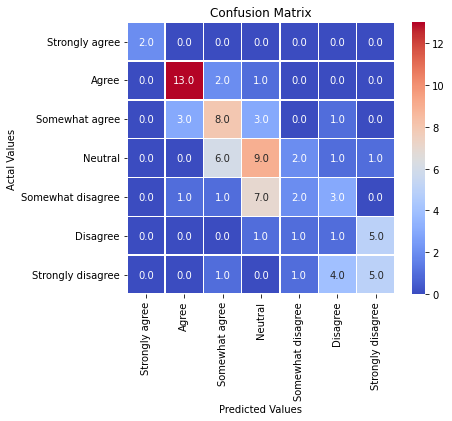

<Figure size 432x288 with 0 Axes>

In [ ]:
# cross-validation confusion matrix data
cm = confusion_matrix(Ytest, yhat_log_Reg)
cm_df = pd.DataFrame(cm, index = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'],
                     columns = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'])
#Plotting the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_df,fmt=".1f", annot=True, linewidths=.5,cmap='coolwarm')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
plt.savefig("CF_LR_FS.PNG")

In [ ]:
# create a regressor object
d_tree = DecisionTreeClassifier(random_state = 0) 

# starting the timer
start = time.time()
  
# fit the regressor with X and Y data
d_tree.fit(Xtrain, Ytrain)

# predicting on the test set
y_pred = d_tree.predict(Xtest)

end = time.time() - start
print(f"Decision Tree took {end} seconds")

# checking for Recall, Precision and Fscore of Baseline model
p,r,f,s = precision_recall_fscore_support(Ytest,y_pred, average="macro")

# Printing the results
print(f"Precision:{p}")
print(f"Recall: {r}")
print(f"F-score: {f}")

metrics.f1_score(Ytest, y_pred, average='weighted')

Decision Tree took 0.011124849319458008 seconds
Precision:0.5367572786690433
Recall: 0.57433193373043
F-score: 0.5475045880811625


0.5223060354775722

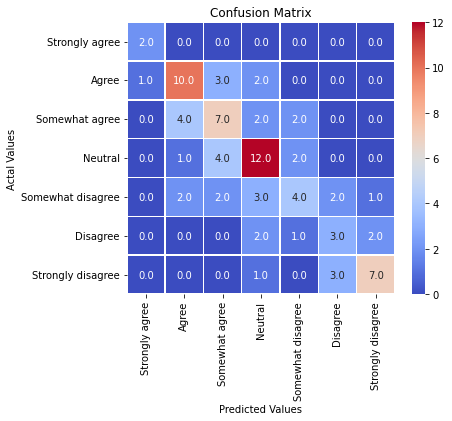

<Figure size 432x288 with 0 Axes>

In [ ]:
# cross-validation confusion matrix data
cm = confusion_matrix(Ytest, y_pred)
cm_df = pd.DataFrame(cm, index = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'],
                     columns = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'])
#Plotting the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_df,fmt=".1f", annot=True, linewidths=.5,cmap='coolwarm')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
plt.savefig("CF_DT_FS.PNG")

In [ ]:
# create a regressor object
d_tree_ = DecisionTreeClassifier(random_state = 7)

# Specifying the hyperparameters and setting
dt_params = [{'max_depth':[2,4,10,50,100,None]},
             {'random_state':[2,7,42]},
             {'max_features':[9,15,36]}]

# Instantiating the Grid search class (cross-validation)
grid_search = GridSearchCV(d_tree_, dt_params, cv=10, scoring="f1_macro", return_train_score=True)

# Starting the timer
start = time.time()

# Fitting the model
grid_search.fit(Xtrain,Ytrain)

# predicting on the test set
y_pred_tuned = grid_search.predict(Xtest)

end = time.time() - start
print(f"HYPERPARAMETRE TUNED Decision Tree AFTER FEATURE ELIMINATION took {end} seconds")

#finding the best MOdel
print(f"Best estimator  = {grid_search.best_estimator_}")

# checking for Recall, Precision and Fscore of Baseline model
p,r,f,s = precision_recall_fscore_support(Ytest,y_pred_tuned, average="macro")

# Printing the results
print(f"Precision:{p}")
print(f"Recall: {r}")
print(f"F-score: {f}")

metrics.f1_score(Ytest, y_pred_tuned, average='weighted')

HYPERPARAMETRE TUNED Decision Tree AFTER FEATURE ELIMINATION took 1.7003345489501953 seconds
Best estimator  = DecisionTreeClassifier(max_depth=4, random_state=7)
Precision:0.6595238095238096
Recall: 0.6878775672948605
F-score: 0.6587004177066288


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 308, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

 

0.6553518111574377

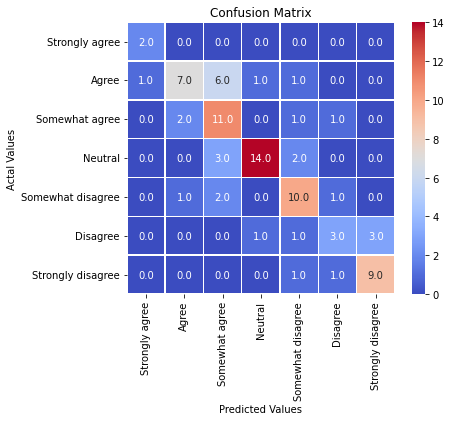

<Figure size 432x288 with 0 Axes>

In [ ]:
# cross-validation confusion matrix data
cm = confusion_matrix(Ytest, y_pred_tuned)
cm_df = pd.DataFrame(cm, index = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'],
                     columns = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'])
#Plotting the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_df,fmt=".1f", annot=True, linewidths=.5,cmap='coolwarm')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
plt.savefig("CF_DT_TUNED_FS.PNG")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# create a RandomForestClassifier object
forest_reg_ = RandomForestClassifier(n_estimators= 10) 

# starting the timer
start = time.time()
  
# fit the regressor with X and Y data
forest_reg_.fit(Xtrain, Ytrain)

# predicting on the test set
y_pred_RF = forest_reg_.predict(Xtest)

end = time.time() - start
print(f"Radom forest took {end} seconds")


# checking for Recall, Precision and Fscore of 
p,r,f,s = precision_recall_fscore_support(Ytest,y_pred_RF,average="macro")

# Printing the results
print(f"Precision:{p}")
print(f"Recall: {r}")
print(f"F-score: {f}")

scores = cross_val_score(forest_reg_, Xtrain, Ytrain, scoring = "neg_mean_squared_error" , cv=10)
rmse_scores = np.sqrt(-scores)

#print(rmse_scores)

metrics.f1_score(Ytest, y_pred_RF, average='weighted')

Radom forest took 0.025405406951904297 seconds
Precision:0.6863424795755623
Recall: 0.6521140513621716
F-score: 0.6285677907526647


0.6211286867688253

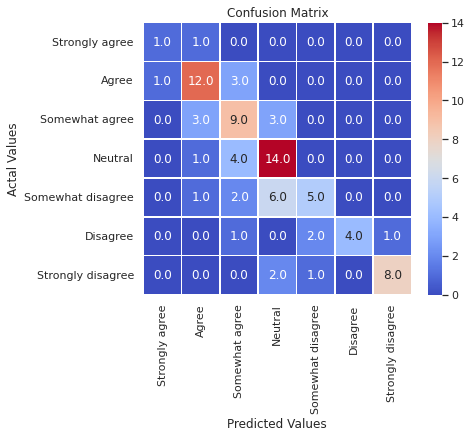

<Figure size 1080x576 with 0 Axes>

In [ ]:
# cross-validation confusion matrix data
cm = confusion_matrix(Ytest, y_pred_RF)
cm_df = pd.DataFrame(cm, index = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'],
                     columns = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'])
#Plotting the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_df,fmt=".1f", annot=True, linewidths=.5,cmap='coolwarm')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
plt.savefig("CF_RF_FS.PNG")

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Initializing the RandomForestClassifier class
forest_reg_tuned = RandomForestClassifier(random_state=7)

# Specifiying the Parameters
param_grid = [{'n_estimators': [10, 20, 100],
               'max_depth': [5,10,50, None],
               'bootstrap': [True,False]},]

# Cross-validating for the Fscore for all Hyperparameters
rf_grid_search = GridSearchCV(forest_reg_tuned, param_grid , cv=10,
                              scoring='f1_macro',
                              return_train_score=True)

# starting the timer
start = time.time()

# Fitting the Random Forest HyperParameter Tuned model
rf_grid_search.fit(Xtrain, Ytrain)

end = time.time() - start
print(f"Tuned Random Forest AFTER REMOVING HIGHLY CORRELATED FEATURES took {end} seconds")

#finding the best MOdel
print(f"Best estimator  = {rf_grid_search.best_estimator_}")

# predicting on the test set
y_pred_RF_tuned = rf_grid_search.predict(Xtest)

# checking for Recall, Precision and Fscore of 
p,r,f,s = precision_recall_fscore_support(Ytest,y_pred_RF_tuned,average="macro")

# Printing the results
print(f"Precision:{p}")
print(f"Recall: {r}")
print(f"F-score: {f}")

metrics.f1_score(Ytest, y_pred_RF_tuned, average='weighted')

Tuned Random Forest AFTER REMOVING HIGHLY CORRELATED FEATURES took 23.321255922317505 seconds
Best estimator  = RandomForestClassifier(bootstrap=False, max_depth=50, random_state=7)
Precision:0.6898738442745519
Recall: 0.6863119649773786
F-score: 0.6853832442067737


0.6469060351413293

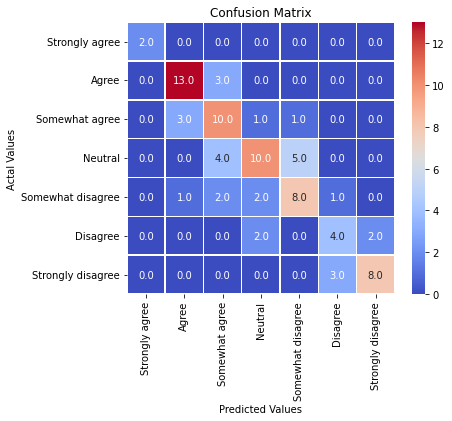

<Figure size 432x288 with 0 Axes>

In [19]:
# cross-validation confusion matrix data
cm = confusion_matrix(Ytest, y_pred_RF_tuned)
cm_df = pd.DataFrame(cm, index = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'],
                     columns = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'])
#Plotting the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_df,fmt=".1f", annot=True, linewidths=.5,cmap='coolwarm')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
plt.savefig("CF_RF_TUNED_FS.PNG")

In [ ]:
knn_ = KNeighborsClassifier(n_neighbors=5)

# starting the timer
start = time.time()

knn_.fit(Xtrain, Ytrain)

end = time.time() - start
print(f"KNN WITH SMOTE OVERSAMPLING took {end} seconds")

# Evaluating model on test data
yhat_knn_ = knn_.predict(Xtest)

# checking for Recall, Precision and Fscore of Baseline model
p,r,f,s = precision_recall_fscore_support(Ytest,yhat_knn_, average="macro")

# Printing the results
print(f"Precision:{p}")
print(f"Recall: {r}")
print(f"F-score: {f}")

metrics.f1_score(Ytest, yhat_knn_, average='weighted')

KNN WITH SMOTE OVERSAMPLING took 0.0073468685150146484 seconds
Precision:0.35069124423963133
Recall: 0.3739173420564398
F-score: 0.3499498746867168


0.35842518059855527

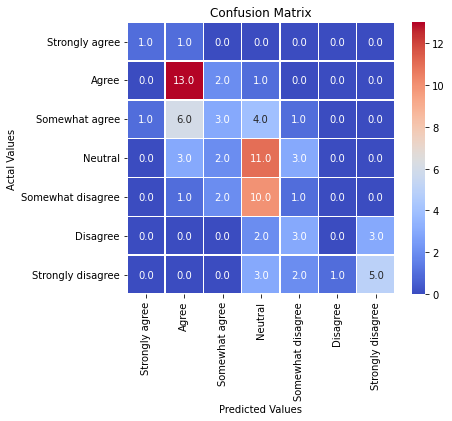

<Figure size 432x288 with 0 Axes>

In [ ]:
# cross-validation confusion matrix data
cm = confusion_matrix(Ytest, yhat_knn_)
cm_df = pd.DataFrame(cm, index = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'],
                     columns = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'])
#Plotting the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_df,fmt=".1f", annot=True, linewidths=.5,cmap='coolwarm')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
plt.savefig("CF_KNN_FS.PNG")

In [ ]:
# Instantiating the SVC class
svm_c_ = SVC()

# starting the timer
start = time.time()

# Fitting the Random Forest HyperParameter Tuned model
svm_c_.fit(Xtrain, Ytrain)

end = time.time() - start
print(f"SVM after smote oversampling took {end} seconds")


# predicting on the test set
y_pred_svm = svm_c_.predict(Xtest)

# checking for Recall, Precision and Fscore of 
p,r,f,s = precision_recall_fscore_support(Ytest,y_pred_svm,average="macro")

# Printing the results
print(f"Precision:{p}")
print(f"Recall: {r}")
print(f"F-score: {f}")

metrics.f1_score(Ytest, y_pred_svm, average='weighted')

SVM after smote oversampling took 0.024417877197265625 seconds
Precision:0.35693354264782834
Recall: 0.39097622302509516
F-score: 0.36795621143447227


0.44718316084044984

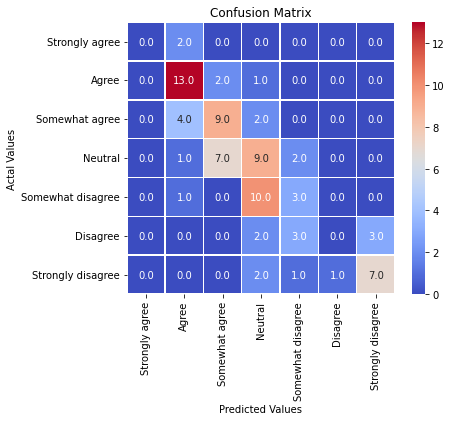

<Figure size 432x288 with 0 Axes>

In [ ]:
# cross-validation confusion matrix data
cm = confusion_matrix(Ytest, y_pred_svm)
cm_df = pd.DataFrame(cm, index = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'],
                     columns = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'])
#Plotting the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_df,fmt=".1f", annot=True, linewidths=.5,cmap='coolwarm')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
plt.savefig("CF_SVM_FS.PNG")

In [ ]:
lsvm = SVC()

#specifying the Hyperparameters
param_grid_lsvm = {'C' : [0.01, 0.1, 1, 3, 10, 100],
                   'max_iter' : [10,50,100,1000,5000,10000],
                   'random_state' : [7,42]
                   }

# Cross-validating for the Fscore for all Hyperparameters
svm_grid_search = GridSearchCV(lsvm, param_grid_lsvm , cv=10,scoring='f1_macro',return_train_score=True)

# starting the timer
start = time.time()

# Fitting the Random Forest HyperParameter Tuned model
svm_grid_search.fit(Xtrain, Ytrain)

end = time.time() - start
print(f"SVM after REMOVING HIGHLY CORRELATED VARIABLES took {end} seconds")

#finding the best MOdel
print(f"Best estimator  = {svm_grid_search.best_estimator_}")

# predicting on the test set
y_pred_svm = svm_grid_search.predict(Xtest)

# checking for Recall, Precision and Fscore of 
p,r,f,s = precision_recall_fscore_support(Ytest,y_pred_svm,average="macro")

# Printing the results
print(f"Precision:{p}")
print(f"Recall: {r}")
print(f"F-score: {f}")

metrics.f1_score(Ytest, y_pred_svm, average='weighted')

SVM after REMOVING HIGHLY CORRELATED VARIABLES took 18.81023144721985 seconds
Best estimator  = SVC(C=10, max_iter=1000, random_state=7)
Precision:0.4640351595183528
Recall: 0.5356093154965336
F-score: 0.49244663382594417


0.47282438994406545

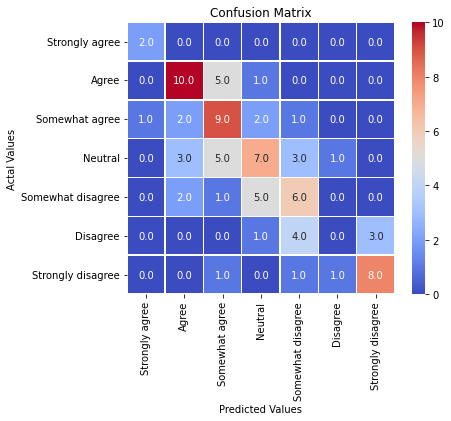

<Figure size 432x288 with 0 Axes>

In [ ]:
# cross-validation confusion matrix data
cm = confusion_matrix(Ytest, y_pred_svm)
cm_df = pd.DataFrame(cm, index = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'],
                     columns = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'])
#Plotting the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_df,fmt=".1f", annot=True, linewidths=.5,cmap='coolwarm')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
plt.savefig("CF_SVM_TUNED_FS.PNG")

In [ ]:
n_class = len(unique(test_set))

# define the keras model
model = Sequential()
model.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(n_class, activation='softmax'))

# compile the keras model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

# fit the keras model on the dataset
model.fit(Xtrain, Ytrain, epochs=200, batch_size=16, verbose=2)
# evaluate on test set
yhat_NN = model.predict(Xtest)
yhat_NN = argmax(yhat_NN, axis=-1).astype('int')
acc = accuracy_score(Ytest, yhat_NN)
print('Accuracy: %.3f' % acc)


# checking for Recall, Precision and Fscore of 
p,r,f,s = precision_recall_fscore_support(Ytest,yhat_NN,average="macro")

# Printing the results
print(f"Precision:{p}")
print(f"Recall: {r}")
print(f"F-score: {f}")

metrics.f1_score(Ytest, yhat_NN, average='weighted')

Epoch 1/200
22/22 - 0s - loss: 2.8728 - 427ms/epoch - 19ms/step
Epoch 2/200
22/22 - 0s - loss: 2.3553 - 39ms/epoch - 2ms/step
Epoch 3/200
22/22 - 0s - loss: 2.1876 - 45ms/epoch - 2ms/step
Epoch 4/200
22/22 - 0s - loss: 2.0946 - 60ms/epoch - 3ms/step
Epoch 5/200
22/22 - 0s - loss: 2.0246 - 48ms/epoch - 2ms/step
Epoch 6/200
22/22 - 0s - loss: 1.9735 - 49ms/epoch - 2ms/step
Epoch 7/200
22/22 - 0s - loss: 1.9357 - 47ms/epoch - 2ms/step
Epoch 8/200
22/22 - 0s - loss: 1.9057 - 61ms/epoch - 3ms/step
Epoch 9/200
22/22 - 0s - loss: 1.8854 - 50ms/epoch - 2ms/step
Epoch 10/200
22/22 - 0s - loss: 1.8631 - 40ms/epoch - 2ms/step
Epoch 11/200
22/22 - 0s - loss: 1.8419 - 44ms/epoch - 2ms/step
Epoch 12/200
22/22 - 0s - loss: 1.8218 - 46ms/epoch - 2ms/step
Epoch 13/200
22/22 - 0s - loss: 1.8157 - 41ms/epoch - 2ms/step
Epoch 14/200
22/22 - 0s - loss: 1.8053 - 49ms/epoch - 2ms/step
Epoch 15/200
22/22 - 0s - loss: 1.7783 - 40ms/epoch - 2ms/step
Epoch 16/200
22/22 - 0s - loss: 1.7334 - 40ms/epoch - 2ms/step

3/3 [==============================] - 0s 7ms/step
Accuracy: 0.494
Precision:0.5602740117025832
Recall: 0.47578890407837776
F-score: 0.4962405004899172


0.499307949941237

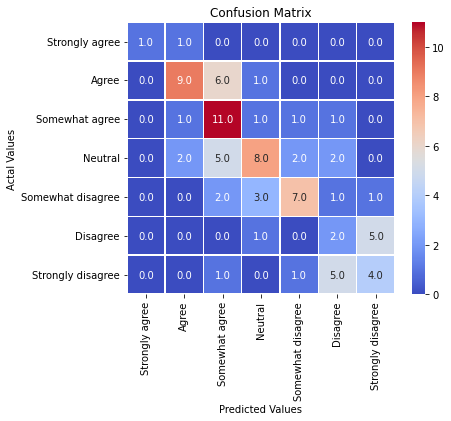

<Figure size 432x288 with 0 Axes>

In [ ]:
# cross-validation confusion matrix data
cm = confusion_matrix(Ytest, yhat_NN)
cm_df = pd.DataFrame(cm, index = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'],
                     columns = ['Strongly agree','Agree','Somewhat agree','Neutral','Somewhat disagree','Disagree','Strongly disagree'])
#Plotting the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_df,fmt=".1f", annot=True, linewidths=.5,cmap='coolwarm')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
plt.savefig("CF_NN_FS.PNG")

Logistic Regression: 0.420588 (0.039569)
Decision Tree: 0.476471 (0.078701)
Decision Tree tuned: 0.488235 (0.073471)
Random Forest: 0.529412 (0.075560)
Random Forest Tuned: 0.532353 (0.059482)
SVM: 0.447059 (0.039019)


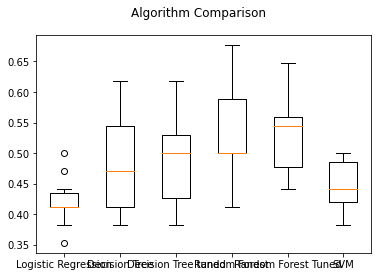

In [ ]:
from sklearn import model_selection

# prepare models
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Decision Tree tuned', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Random Forest Tuned', RandomForestClassifier()))
models.append(('SVM', SVC()))
#models.append(('Neural Netwrok', Sequential()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
 kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
 cv_results = model_selection.cross_val_score(model, Xtrain, Ytrain, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()